# Generating Synthetic data for 100 trials

This file goes over the process of generating a synthetic trial, your job is to replicate this process 100 times and store the results in json format on a text file for later processing.  Read the comments to get an idea about the missing code.



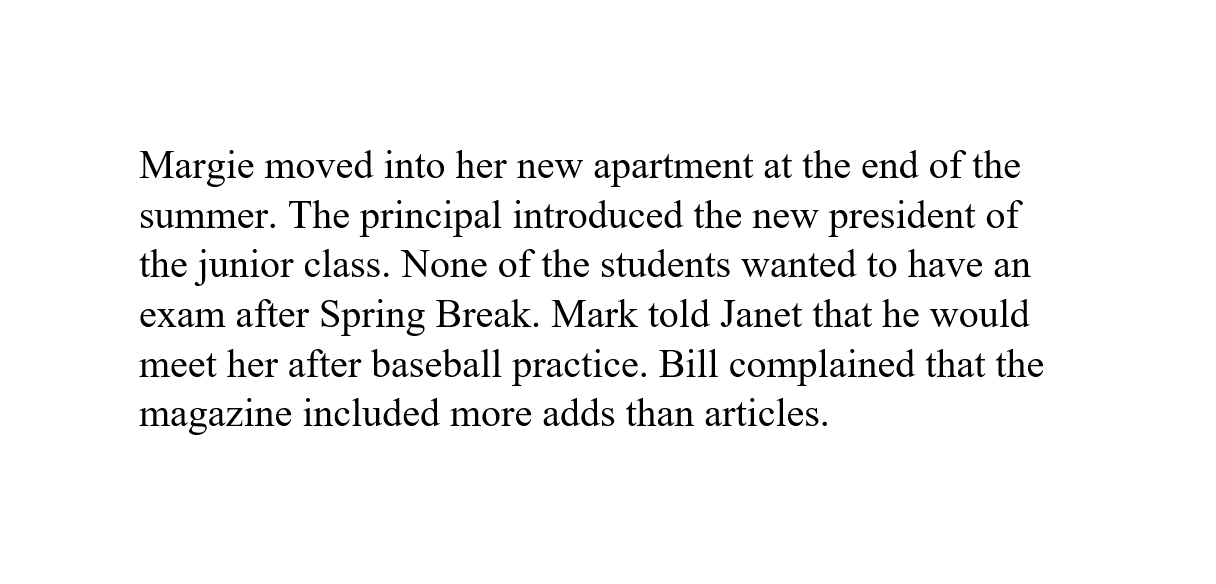

In [2]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='synthetic_text.png')
img

In [3]:
# yup, this is the same library we used last semester.  We call that foreshadowing :)

import emip_toolkit as EMTK

In [4]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

c:\Users\adaob\Desktop\CS421-project1\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\adaob\Desktop\CS421-project1\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\adaob\Desktop\CS421-project1\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\adaob\Desktop\CS421-project1\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\adaob\Desktop\CS421-project1\emip_toolkit.py:12

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png


In [5]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

c:\Users\adaob\Desktop\CS421-project1\emip_toolkit.py:1367: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location in aois_raw["name"].iteritems():


,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png,new


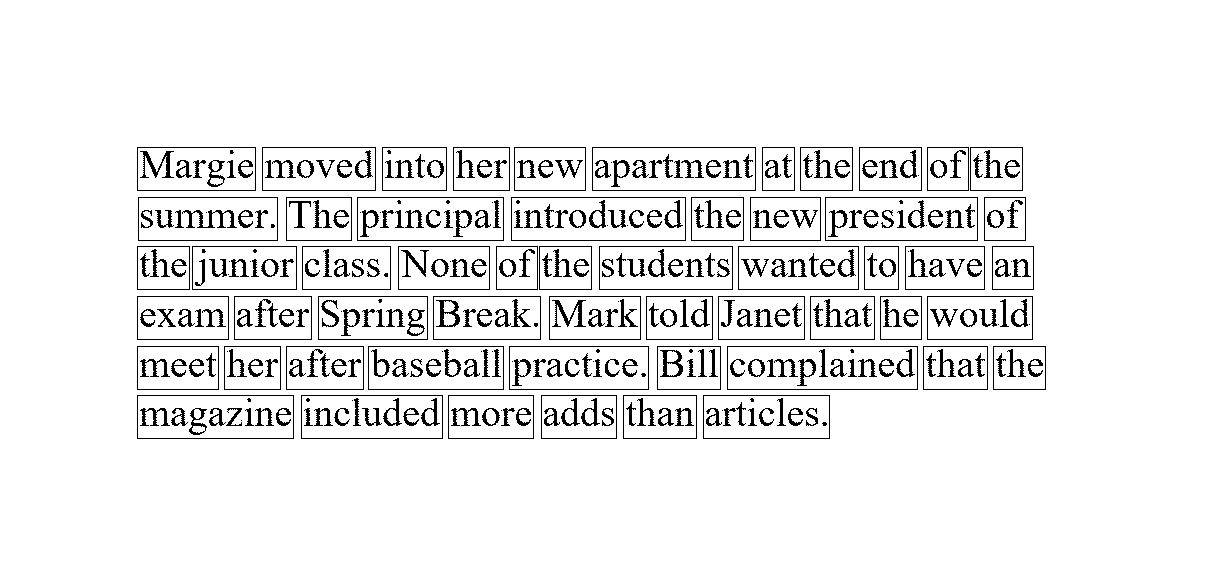

In [6]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

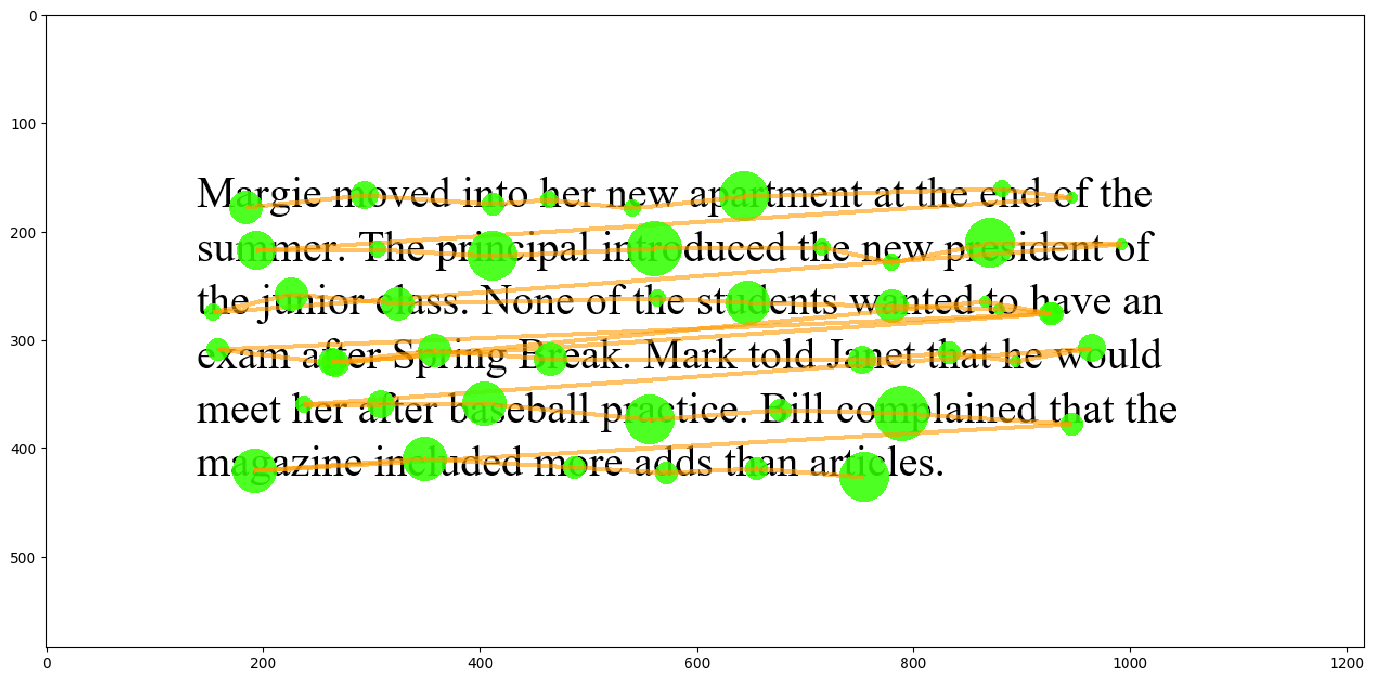

In [7]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)

# drawing the synthetic data!
correction.draw_fixation('synthetic_text.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

Look at that, we did something cool!  Now that we know how to generate a single snythetic trial, let's generate 100 and store them in a text file called "synthetic_dataset_with_time.txt" in json format.  I will guide you through the steps using the comments!

In [8]:
data = {}

# loop 100 times maintaining a variable called index
for i in range(100):

    # generate a synthetic trial using similar code to the one above
    synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)
    
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    key = "robot" + str(i)
    data[key] = synth_fixations
    


In [9]:
# check that the data looks correct

data["robot1"]

[[171.16666666666666, 175.0, 300],
 [302.5, 179.0, 250],
 [401.1666666666667, 169.0, 200],
 [472.5, 179.0, 150],
 [652.1666666666666, 163.0, 450],
 [875.5, 171.0, 150],
 [949.5, 165.0, 100],
 [980.1666666666666, 167.0, 150],
 [188.16666666666666, 225.0, 350],
 [309.5, 214.0, 150],
 [415.5, 228.0, 450],
 [565.8333333333334, 212.0, 500],
 [704.1666666666666, 228.0, 150],
 [772.1666666666666, 223.0, 150],
 [875.5, 227.0, 450],
 [1007.5, 224.0, 100],
 [222.5, 275.0, 300],
 [326.1666666666667, 266.0, 300],
 [502.5, 274.0, 100],
 [562.1666666666666, 273.0, 150],
 [642.1666666666666, 264.0, 400],
 [422.1666666666667, 258.0, 200],
 [507.5, 273.0, 100],
 [551.1666666666666, 262.0, 150],
 [637.1666666666666, 276.0, 400],
 [773.8333333333334, 259.0, 300],
 [875.1666666666666, 271.0, 100],
 [174.16666666666666, 321.0, 200],
 [251.5, 318.0, 250],
 [358.1666666666667, 327.0, 300],
 [459.5, 312.0, 300],
 [571.1666666666666, 319.0, 200],
 [659.8333333333334, 308.0, 200],
 [749.5, 325.0, 250],
 [841.16

In [10]:

# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"
import json

with open("synthetic_dataset_with_time.txt","w") as f:
    json.dump(data,f)

That should be it, don't overthink it!  You did great by the way, I can see you, its one of my supernatural abilities.